In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("AI_heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isnull().sum()

age         102
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [6]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
male = df[df["sex"] == "M"]

In [8]:
male.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
6,NaN,M,0,114,318,0,2,140,0,4.4,0,3,1,0


In [9]:
#Now calulate mean of male age
male_age = np.mean(male["age"])
male_age


53.8671875

In [10]:
male.isnull().sum()

age         73
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [11]:
male = male.fillna(male_age)
male.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
male.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.000000,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.000000,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.000000,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.000000,M,0,148,203,0,1,161,0,0.0,2,1,3,0
6,53.867188,M,0,114,318,0,2,140,0,4.4,0,3,1,0


In [13]:
df_Female = df[df["sex"] == "F"]

In [14]:
df_Female.isnull().sum().sum()

29

In [15]:
female_age_mean = np.mean(df_Female["age"])
female_age_mean

56.003533568904594

In [16]:
df_Female = df_Female.fillna(female_age_mean)
df_Female.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df_Female.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58.0,F,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71.0,F,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43.0,F,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34.0,F,1,118,210,0,1,192,0,0.7,2,0,2,1


In [18]:
df2 = pd.concat([male,df_Female])

df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df2.shape

(1025, 14)

In [20]:
dummies = pd.get_dummies(df2["sex"])
dummies.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
6,0,1


In [21]:
df3 = pd.concat([df2,dummies], axis = 1)
df3.shape

(1025, 16)

In [22]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,F,M
0,52.000000,M,0,125,212,0,1,168,0,1.0,2,2,3,0,0,1
1,53.000000,M,0,140,203,1,0,155,1,3.1,0,0,3,0,0,1
2,70.000000,M,0,145,174,0,1,125,1,2.6,0,0,3,0,0,1
3,61.000000,M,0,148,203,0,1,161,0,0.0,2,1,3,0,0,1
6,53.867188,M,0,114,318,0,2,140,0,4.4,0,3,1,0,0,1


In [23]:
df3_1 = df3[df3['target'] == 1]
df3_0 = df3[df3['target'] == 0]


In [26]:
# #t01
# d3_f=  df3_m
# # df_1 =  df[0:]
# # d3_f = df[0:]
# df_0 = df_1

NameError: name 'df3_m' is not defined

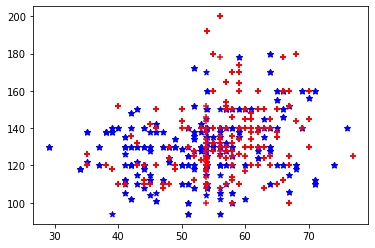

In [49]:
plt.scatter(df3_1["age"], df3_1["trestbps"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["trestbps"], color = 'red', marker = '+')

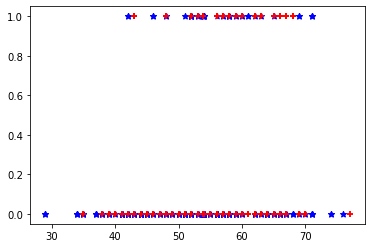

In [50]:
plt.scatter(df3_1["age"], df3_1["fbs"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["fbs"], color = 'red', marker = '+')

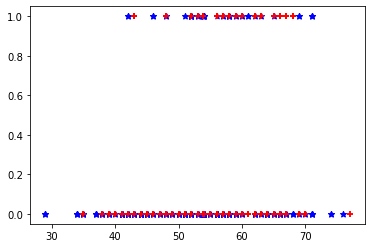

In [52]:
plt.scatter(df3_1["age"], df3_1["fbs"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["fbs"], color = 'red', marker = '+')

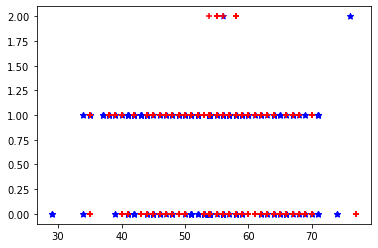

In [53]:
plt.scatter(df3_1["age"], df3_1["restecg"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["restecg"], color = 'red', marker = '+')

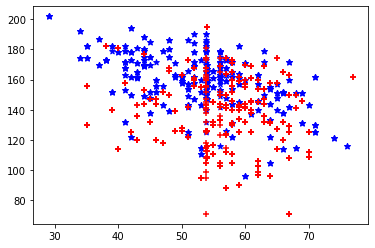

In [54]:
plt.scatter(df3_1["age"], df3_1["thalach"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["thalach"], color = 'red', marker = '+')

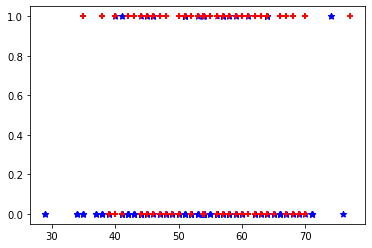

In [55]:

plt.scatter(df3_1["age"], df3_1["exang"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["exang"], color = 'red', marker = '+')

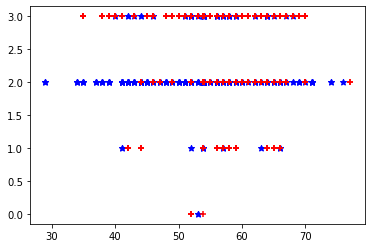

In [56]:
plt.scatter(df3_1["age"], df3_1["thal"], color = 'blue', marker = '*')
plt.scatter(df3_0["age"], df3_0["thal"], color = 'red', marker = '+')

In [34]:
df4 = df3.drop(columns = ['cp','chol','fbs', 'restecg', 'exang','slope', 'ca','thal'])
df4

,age,sex,trestbps,thalach,oldpeak,target,F,M
0,52.000000,M,125,168,1.0,0,0,1
1,53.000000,M,140,155,3.1,0,0,1
2,70.000000,M,145,125,2.6,0,0,1
3,61.000000,M,148,161,0.0,0,0,1
6,53.867188,M,114,140,4.4,0,0,1
...,...,...,...,...,...,...,...,...
996,56.003534,F,134,150,1.9,0,1,0
1004,56.003534,F,140,142,1.5,1,1,0
1005,55.000000,F,128,130,2.0,0,1,0
1014,44.000000,F,108,175,0.6,1,1,0


In [35]:
df5 = df4.drop(columns = ['sex'])
df5.shape
df5.head()

,age,trestbps,thalach,oldpeak,target,F,M
0,52.000000,125,168,1.0,0,0,1
1,53.000000,140,155,3.1,0,0,1
2,70.000000,145,125,2.6,0,0,1
3,61.000000,148,161,0.0,0,0,1
6,53.867188,114,140,4.4,0,0,1


In [36]:
x = df5.drop(columns = ["target"])
y = df5["target"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [45]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=100, activation='relu')
MLP

MLPClassifier(max_iter=100)

In [46]:
MLP.fit(X_train,y_train)

/home/acer/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [47]:
MLP.score(X_train,y_train)

0.7852161785216178

In [48]:
pre = MLP.predict(X_test)
pre

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [42]:
confusion_matrix(y_test,pred)

array([[ 95,  44],
       [ 37, 132]])

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       139
           1       0.75      0.78      0.77       169

    accuracy                           0.74       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.74      0.74      0.74       308

